In [1]:
from pathlib import Path

import matplotlib
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("compression.csv")
df

,dataset,compressor,ratio
0,t2m-1d,"Sz3(predictor='cubic-interpolation-lorenzo', e...",46.876841285428874
1,t2m-1d,"Sz3(predictor='cubic-interpolation-lorenzo', e...",13.17680504613354
2,t2m-1d,"Sz3(predictor='cubic-interpolation-lorenzo', e...",5.800490804743794
3,t2m-1d,"Sz3(predictor='cubic-interpolation-lorenzo', e...",3.2798739530641017
4,t2m-1d,"Sz3(predictor='lorenzo', eb_mode='abs', eb_abs...",49.99169405221913
...,...,...,...
331,"N(0,10)i","Zstd(level=3, _version='0.1.0')",1.5511787465921736
332,"N(0,10)i","SafeguardsCodec(codec=None, safeguards=[Absolu...",6.823534437574656
333,"N(0,10)i","SafeguardsCodec(codec=None, safeguards=[Absolu...",3.9190957965334587
334,"N(0,10)i","SafeguardsCodec(codec=None, safeguards=[Absolu...",2.7675403639620524


In [3]:
tab20c = matplotlib.colormaps["tab20c"].colors

In [4]:
titles = {
    "t2m-1d": r"$T$ [$\degree$K], f32 x flat(721x1440)",
    "tp-1d": "$tp$ [cm], f32 x flat(721x1440)",
    "+t2m": r"$+T$ [$\degree$K], f32 x 721x1440",
    "-t2m": r"$-T$ [$\degree$K], f32 x 721x1440",
    "+tp": "$+tp$ [cm], f32 x 721x1440",
    "-tp": "$-tp$ [cm], f32 x 721x1440",
    "+o3": "$+O_3$ [mg/mg], f32 x 37x721x1440",
    "-o3": "$-O_3$ [mg/mg], f32 x 37x721x1440",
    "N(0,10)": r"N$(0,10)$, f32 x 721x1440",
    "+t2mi": r"$+T$ [$1000 \cdot \degree$K], i32 x 721x1440",
    "-t2mi": r"$-T$ [$1000 \cdot \degree$K], i32 x 721x1440",
    "+tpi": r"$+tp$ [$1000 \cdot$ cm], i32 x 721x1440",
    "-tpi": r"$-tp$ [$1000 \cdot$ cm], i32 x 721x1440",
    "+o3i": r"$+O_3$ [$1000 \cdot$ mg/mg], i32 x 37x721x1440",
    "-o3i": r"$-O_3$ [$1000 \cdot$ mg/mg], i32 x 37x721x1440",
    "N(0,10)i": r"$1000 \cdot$ N$(0,10)$, i32 x 721x1440",
}

In [5]:
plots = Path("plots")
plots.mkdir(exist_ok=True, parents=True)

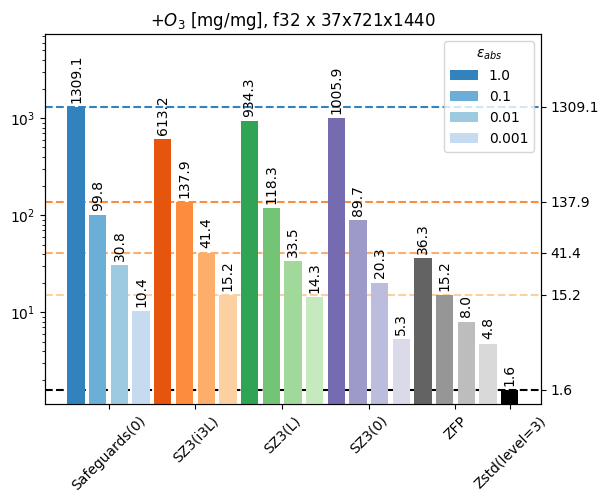

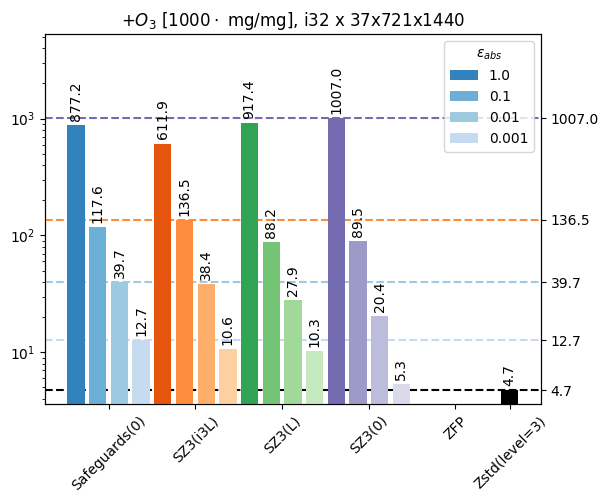

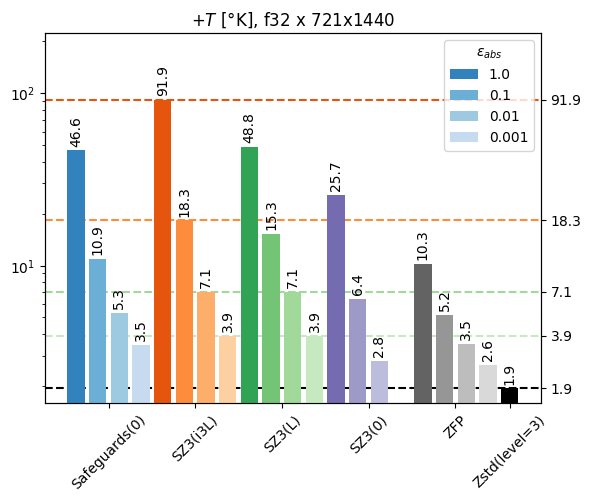

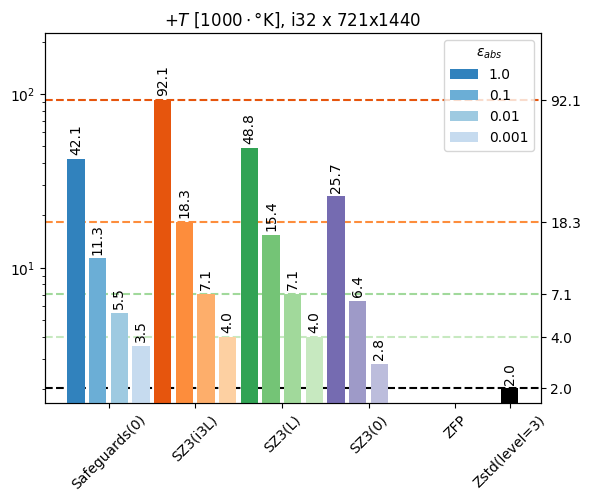

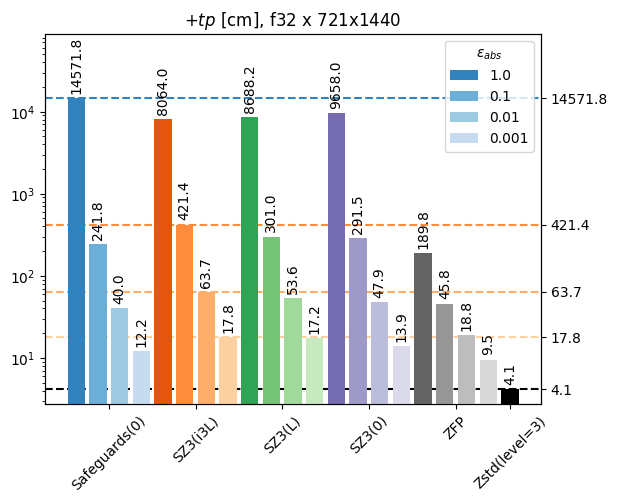

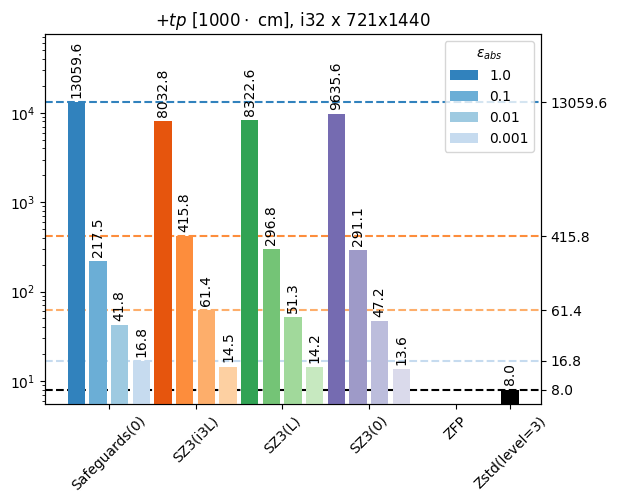

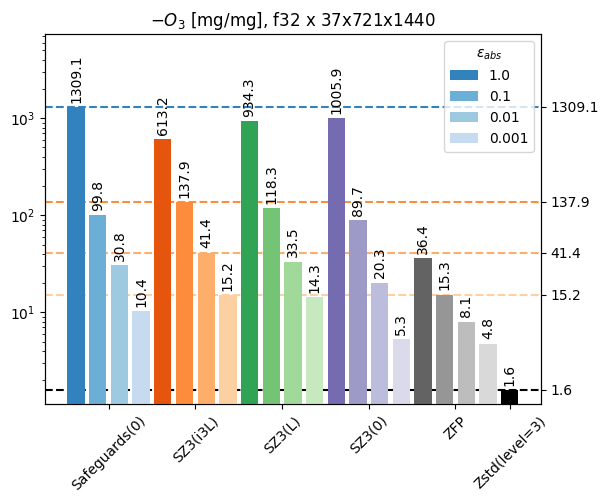

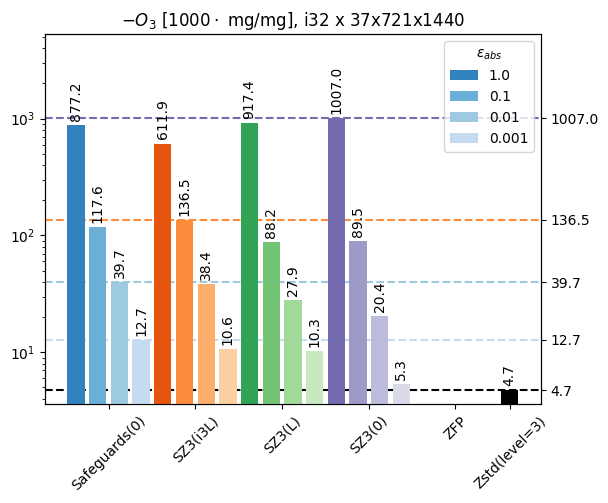

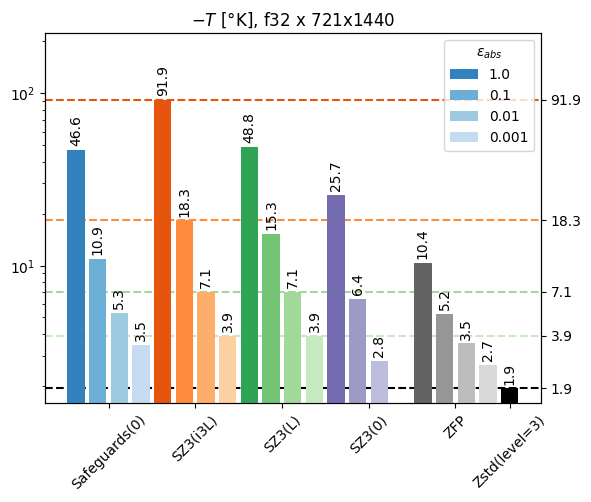

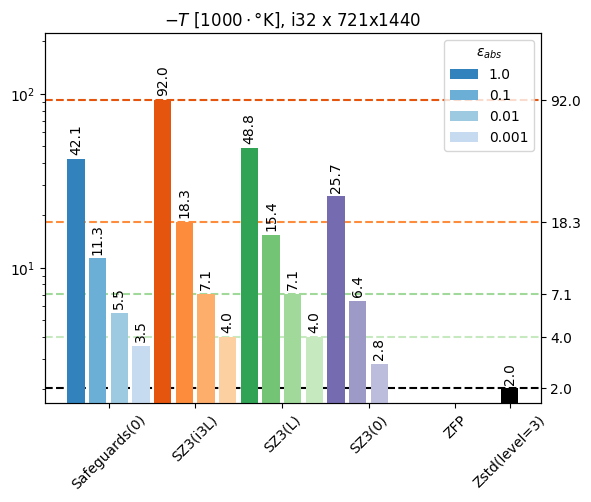

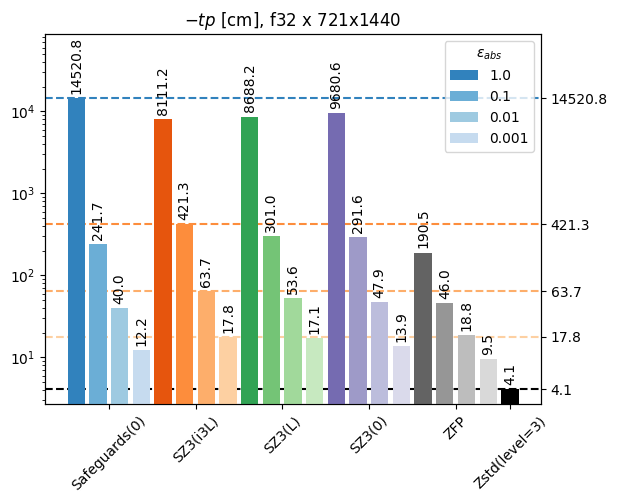

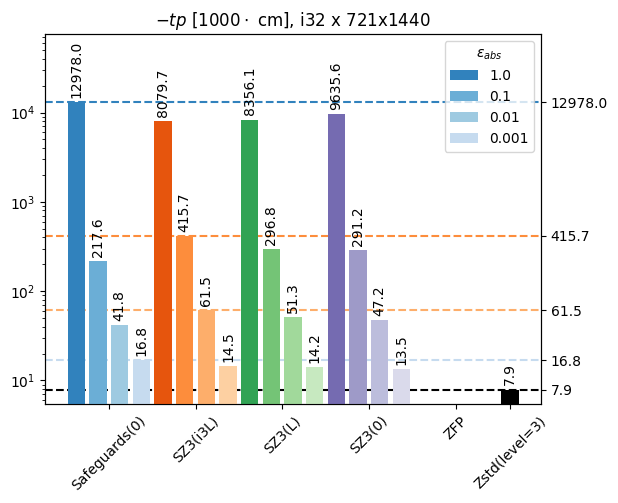

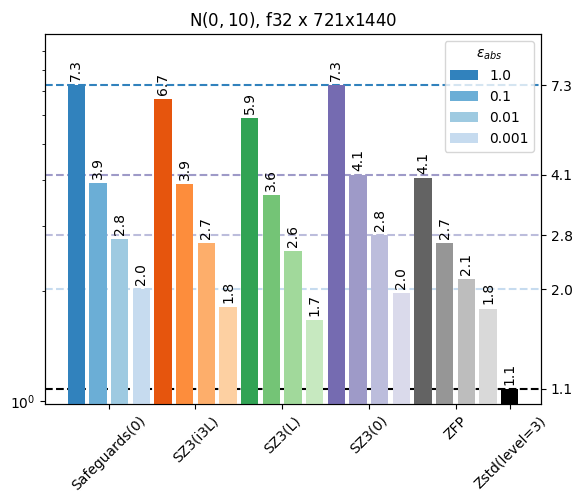

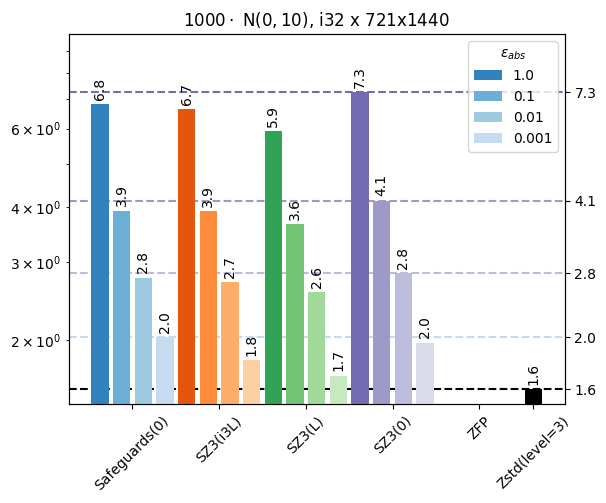

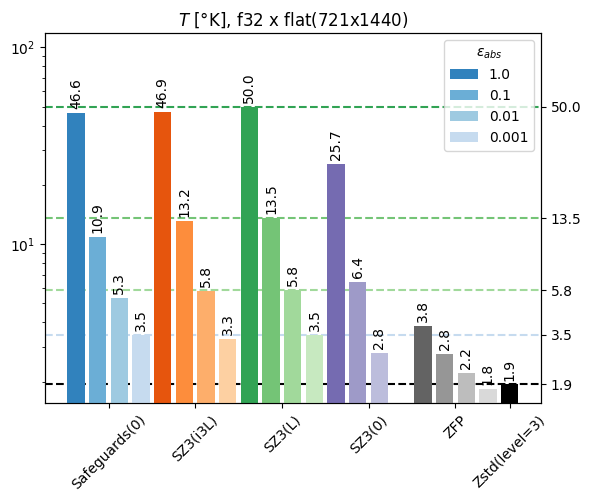

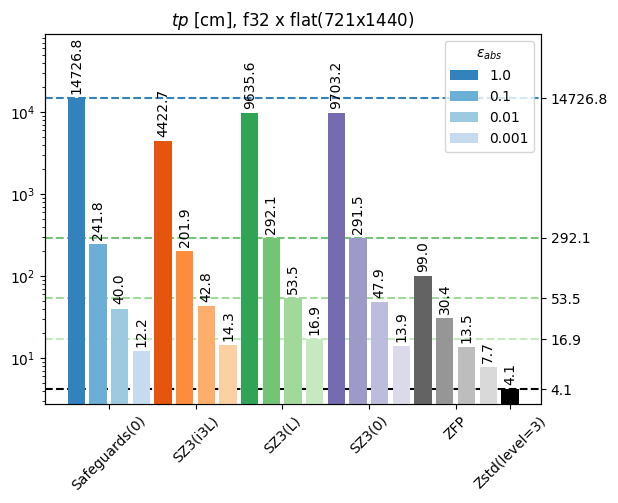

In [6]:
for dataset, a in df.groupby("dataset"):
    a.loc[:, "ratio"] = pd.to_numeric(a["ratio"], errors="coerce")

    index = list(a.index)
    a = a.reindex(index[17:21] + index[0:17])

    fig, ax = plt.subplots()

    colours = tab20c + ("black",)

    maxvals = np.zeros(5)
    maxidxs = np.zeros(5, dtype=int)

    rects = []

    for i in range(len(a)):
        if i < 20:
            if a.iloc[i].ratio > maxvals[i % 4]:
                maxvals[i % 4] = a.iloc[i].ratio
                maxidxs[i % 4] = i
        else:
            maxvals[4] = a.iloc[i].ratio
            maxidxs[4] = i

        rects.append(ax.bar(i, a.iloc[i].ratio, color=colours[i], zorder=4))
        ax.bar_label(
            rects[-1],
            labels=[f"{round(a.iloc[i].ratio, 1)}"],
            padding=3,
            rotation="vertical",
        )

    ax.legend(
        rects[:4],
        ["1.0", "0.1", "0.01", "0.001"],
        title=r"$\epsilon_{abs}$",
        loc="upper right",
    )

    for i in range(5):
        ax.axhline(maxvals[i], c=colours[maxidxs[i]], ls="--")

    ax2 = ax.twinx()

    ax.set_xticks(
        [1.5, 5.5, 9.5, 13.5, 17.5, 20],
        [
            "Safeguards(0)",
            "SZ3(i3L)",
            "SZ3(L)",
            "SZ3(0)",
            "ZFP",
            "Zstd(level=3)",
        ],
        rotation=45,
    )

    ax.set_title(titles.get(dataset, dataset))

    ax.set_yscale("log")
    ax2.set_yscale("log")
    ax.set_ylim(
        ax.set_ylim()[0],
        ax.set_ylim()[1]
        * (4.0 if ax.get_ylim()[1] > 500 else (2.0 if ax.get_ylim()[1] > 50 else 1.25)),
    )

    ax2.set_ylim(*ax.get_ylim())
    ax2.set_yticks(maxvals, [f"{round(r, 1)}" for r in maxvals])
    ax2.minorticks_off()

    plt.savefig(plots / f"{dataset}.pdf", dpi=300)
    plt.show()